In [1]:
master_path = '..\..\Raw_Data\\Bioreactor_Data\\Multispecies'

In [2]:
from lib.tools import *

In [3]:
def quant_4statefrac(data,t_del):
    gk = data.cells.groupby('rel_time_hrs')
    t= np.unique(np.array(data.cells['rel_time_hrs']))
    t_del = sorted(t_del, reverse=True)
    t = np.delete(t,t_del)
    thresh_fp = [0, 200,50,100]
    for jj in range(1,np.size(t)+1):
        lk = gk.get_group(t[jj-1])
#         print(len(lk))
        sz_lk = lk.loc[(lk['gating-metric'] >= thresh1)]
        dbf_lk = sz_lk.loc[(sz_lk['doublet-metric'] <= thresh2)]
#         print(len(dbf_lk))
        db_lk = dbf_lk.loc[(dbf_lk['mCerulean'] > 10) |(dbf_lk['mNeonGreen'] > 100) |(dbf_lk['mScarletI'] > 100)  ]
#         print(len(db_lk))
        viable = len(db_lk)-db_lk.loc[(db_lk['mNeonGreen'] < thresh_fp[1]) &(db_lk['mScarletI']< thresh_fp[3])  ]['mScarletI'].count()
#         print(viable)
        sorti = db_lk.loc[(db_lk['mNeonGreen'] > thresh_fp[1]) &(db_lk['mScarletI'] < thresh_fp[3])  ]
        la = db_lk.loc[(db_lk['mNeonGreen'] < thresh_fp[1]) &(db_lk['mScarletI'] > thresh_fp[3])  ]['mScarletI'].count()
        di = db_lk.loc[(db_lk['mNeonGreen'] > thresh_fp[1]) &(db_lk['mScarletI'] > thresh_fp[3])  ]['mScarletI'].count()
        da = sorti.loc[abs(sorti['mNeonGreen']/sorti['mCerulean'])<700*sorti['mCerulean']**-0.63]['mNeonGreen'].count()

        try:
            s2.append(la/viable)
            s3.append(di/viable)
            s0.append(da/viable)
            s1.append((len(sorti)-da)/viable)
           
        except:
            s2 = [la/viable]
            s3 = [di/viable]

            s0 = [da/viable]
            s1 = [(len(sorti)-da)/viable]


    fra = [np.asarray(s0),np.asarray(s1),np.asarray(s2),np.asarray(s3)]
    return(t,fra)

In [4]:
def quant_4state(data,ax,tps):
    gk = data.cells.groupby('rel_time_hrs')
    t= np.unique(np.array(data.cells['rel_time_hrs']))
    hist_data = []
    thresh_fp = [0, 100,50,200]
    for jj in range(1,np.size(t)+1):
        if jj>tps[1]:
            break
        if (jj > tps[0]) & (jj< tps[1]):
            lk = gk.get_group(t[jj-1])
#             print(len(lk))
            sz_lk = lk.loc[(lk['gating-metric'] >= thresh1)]
            dbf_lk = sz_lk.loc[(sz_lk['doublet-metric'] <= thresh2)]
#             print(len(dbf_lk))
            db_lk = dbf_lk.loc[(dbf_lk['mCerulean'] > 10) |(dbf_lk['mNeonGreen'] > 100) |(dbf_lk['mScarletI'] > 100)  ]
#             print(len(db_lk))
            viable = len(db_lk)-db_lk.loc[(db_lk['mNeonGreen'] < thresh_fp[1]) &(db_lk['mScarletI']< thresh_fp[3])  ]['mScarletI'].count()
#             print(viable)
            ax[0].scatter(db_lk['mScarletI'],db_lk['mNeonGreen'],s = sz,color = 'k')
            sorti = db_lk.loc[(db_lk['mNeonGreen'] > thresh_fp[1]) &(db_lk['mScarletI'] < thresh_fp[3])  ]
            ax[1].scatter(sorti['mCerulean'],abs(sorti['mNeonGreen']/sorti['mCerulean']),s = sz,color = 'b')
            ax[1].plot(np.linspace(0.1,1000,100),700*np.linspace(0.1,1000,100)**-0.63,'r')
    return(sorti)

In [5]:
t=[x[1] for x in os.walk(master_path)]
basepath = os.path.join(master_path,t[0][0])
basepath = os.path.join(basepath,t[1][0])
print(basepath)
all_data1 = {}
reactors = [1,2,3,4,5,6,7,8]
for rid in reactors:
        print(rid)
        all_data1[rid] = ReactorData(f'{basepath}/reactor-{rid}')
        all_data1[rid].cells = do_gating(all_data1[rid])
        all_data1[rid].cells= deconvolve_turbi(all_data1[rid].cells,AF,FP_signatures)

..\..\Raw_Data\Bioreactor_Data\Multispecies\2021-04-27\reactor-data
1
done
2
done
3
done
4
done
5
done
6
done
7
done
8
done


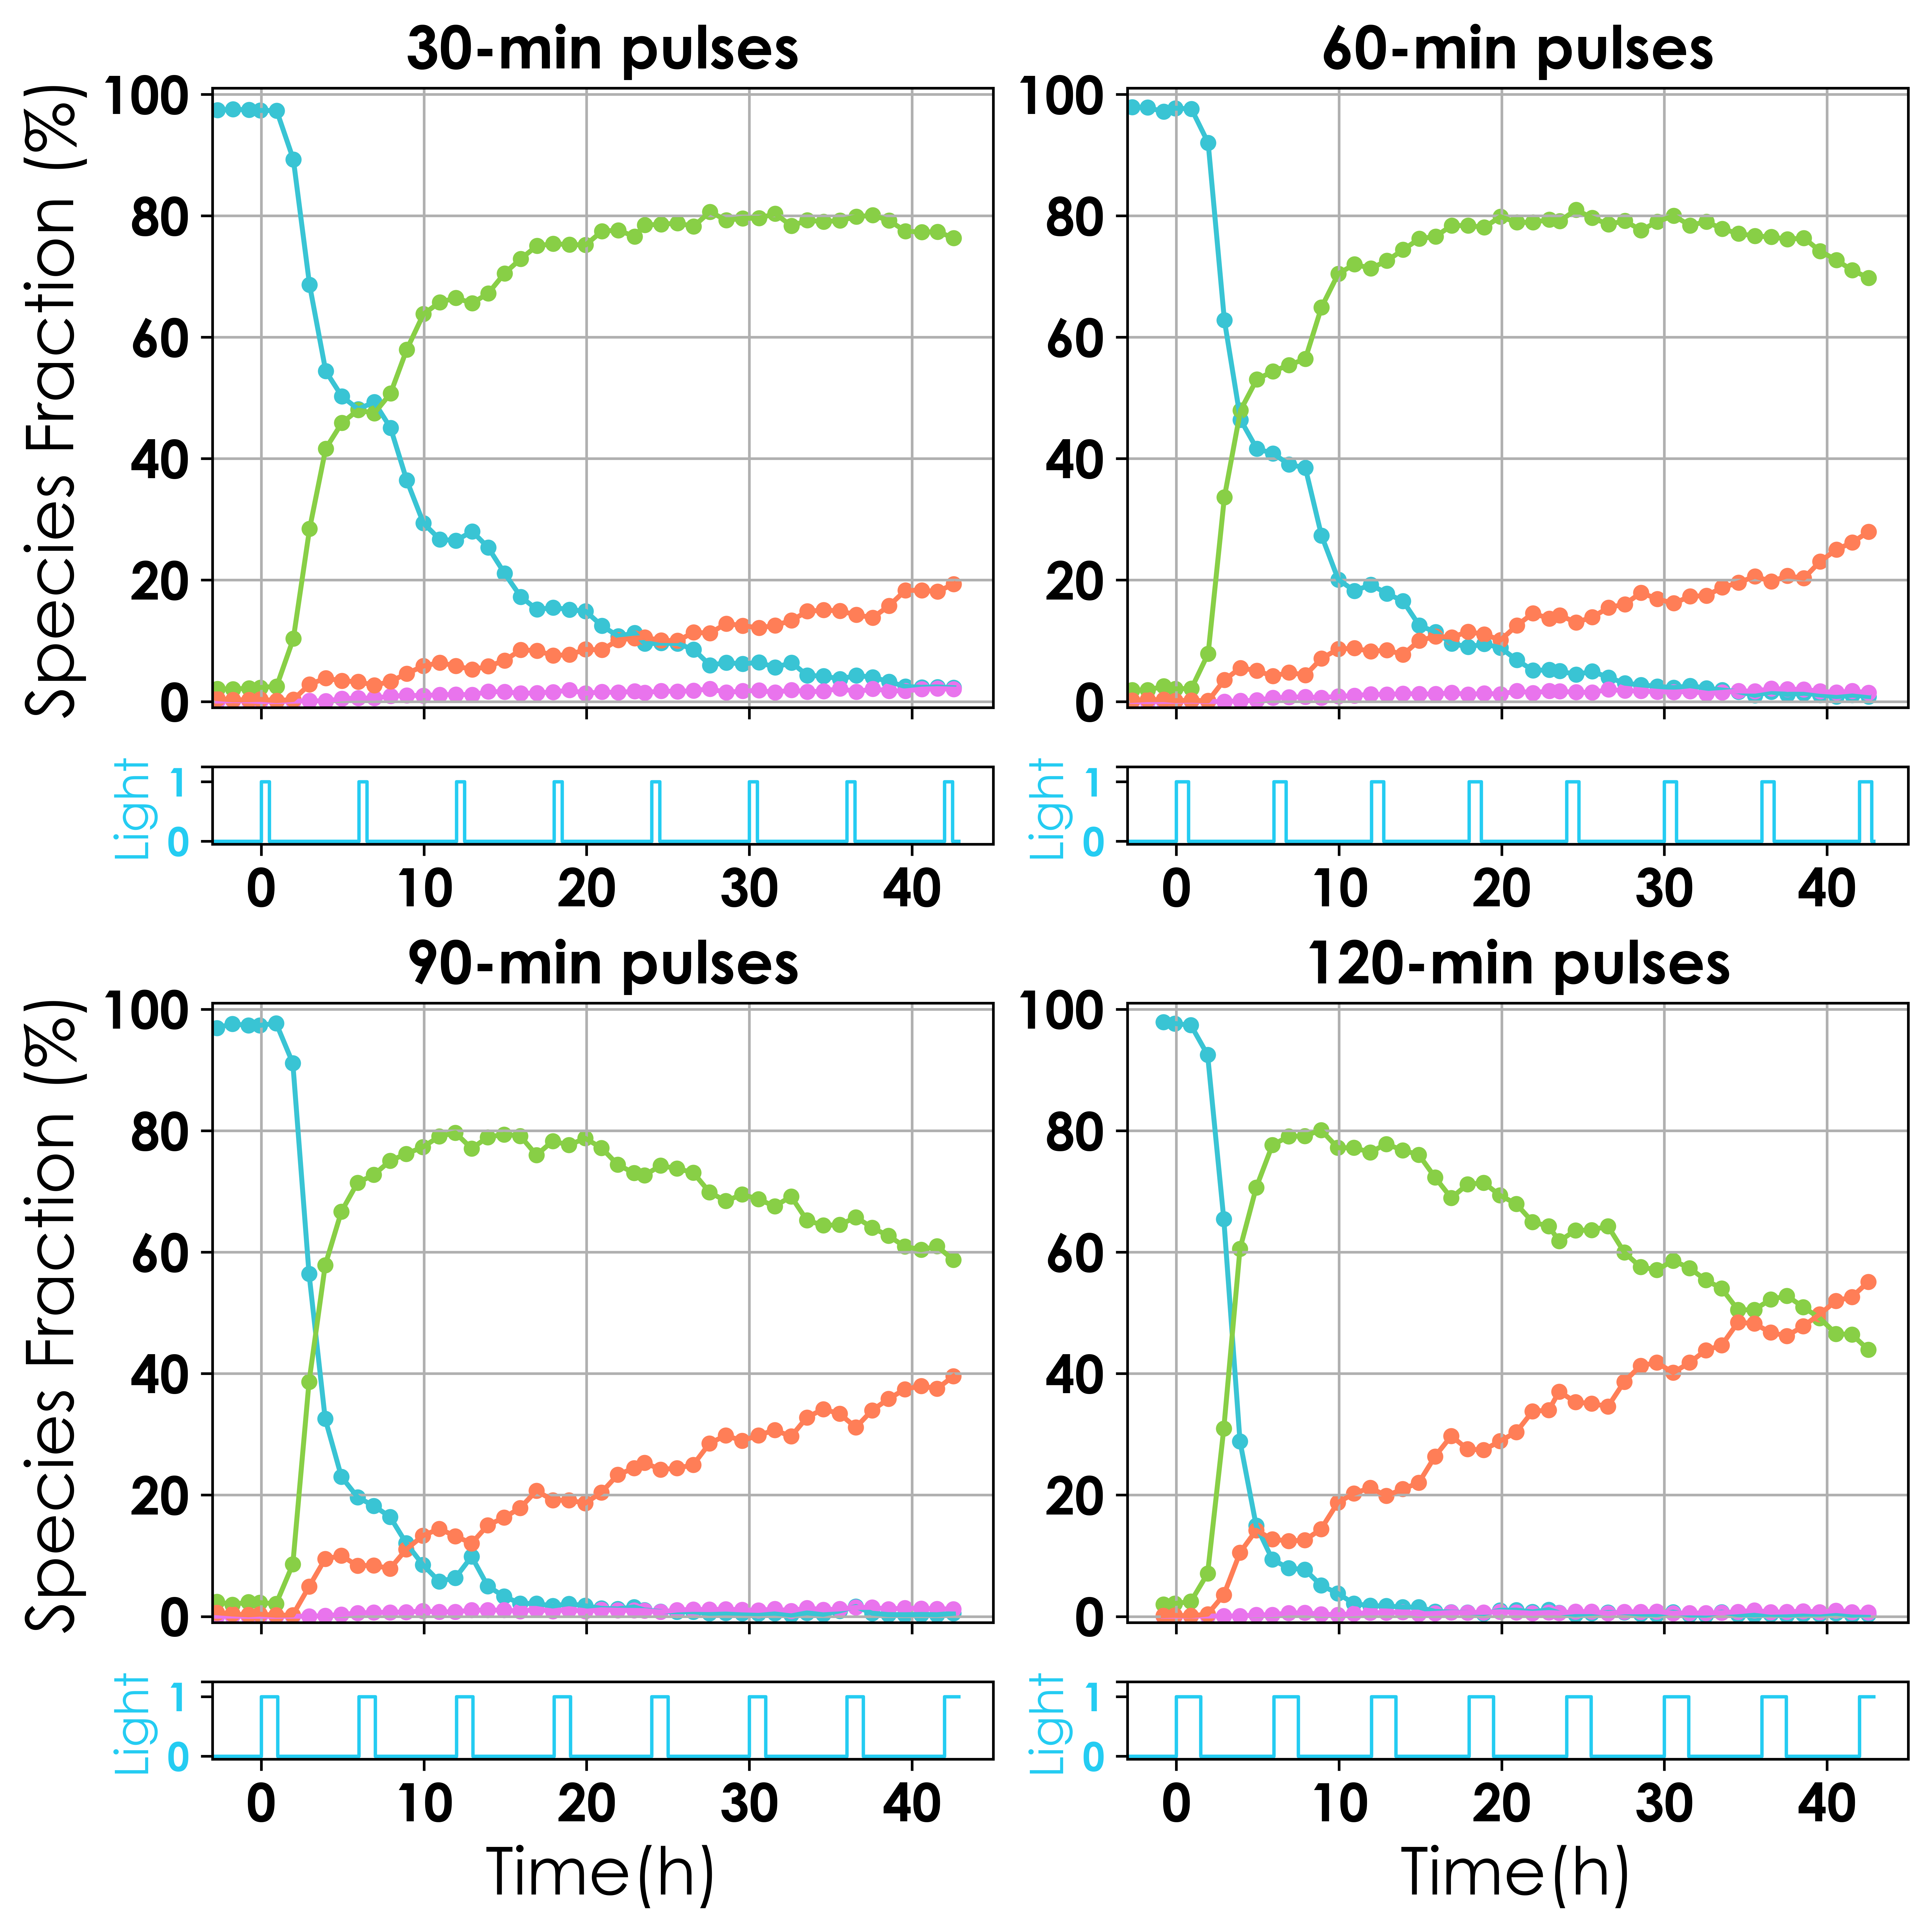

In [7]:
fs = 18
mosaic = """
    AAAAAAAABBBBBBBB
    AAAAAAAABBBBBBBB
    AAAAAAAABBBBBBBB
    AAAAAAAABBBBBBBB
    AAAAAAAABBBBBBBB
    AAAAAAAABBBBBBBB
    AAAAAAAABBBBBBBB
    AAAAAAAABBBBBBBB
    EEEEEEEEFFFFFFFF
    CCCCCCCCDDDDDDDD
    CCCCCCCCDDDDDDDD
    CCCCCCCCDDDDDDDD
    CCCCCCCCDDDDDDDD
    CCCCCCCCDDDDDDDD
    CCCCCCCCDDDDDDDD
    CCCCCCCCDDDDDDDD
    CCCCCCCCDDDDDDDD
    GGGGGGGGHHHHHHHH
    """
axesd = plt.figure(constrained_layout=True,figsize = (8,8),dpi=800).subplot_mosaic(mosaic)
axes = [axesd[i] for i in ['A','B','C', 'D']]
axesl = [axesd[i] for i in ['E','F','G', 'H']]
thresh1 = 0.05
thresh2 = 0.95
thresh_fp = [-1, 200,50,200]
colors= ['#39c4d4','#88cf46','#e974ed','#ff7e57']
evenly_spaced_interval = np.linspace(0, 1,4*len(axes)+1)
colori = [plt.cm.inferno(x) for x in evenly_spaced_interval]
colors = [colori[3],colori[6],colori[9],colori[12]]
colors= ['#39c4d4','#88cf46','#e974ed','#ff7e57']
t_shift =25.3
t_dels = []
marks = ['o','o','o','o']
title = ['S0', 'S1','S2','S3']
labi = ['$CN^{\prime}$','$\overline{C}N^{\prime}$','$C\overline{N^{\prime}}$','$\overline{CN^{\prime}}$']
title = ['30-min pulses','60-min pulses','90-min pulses','120-min pulses']
lims = [(-1,101),(-1,101),(-1,101),(-1,101)]
xlims = [(-3,45),(-3,45),(-3,45),(-3,45)]
ticks = [[0,20,40,60,80,100],[0,20,40,60,80,100],[0,20,40,60,80,100],[0,20,40,60,80,100]]
for zz,rid in enumerate([5,6,7,8]):

    t_del = [0,1,2,3,4,5,6,7,8]
    t,rec_fraction= quant_4statefrac(all_data1[rid],t_del)
    df_LEDs = all_data1[rid].data_to_df('LEDs')
    for jj, state in enumerate(rec_fraction):
        axes[zz].grid(True)
        axes[zz].scatter(t-t_shift,state*100,s = 15 , color=colors[jj],marker = marks[jj],label = labi[jj])
        axes[zz].plot(t-t_shift,state*100 , color=colors[jj])
        axes[zz].set_title(title[zz], fontsize=fs,**cgfont,fontweight='bold')
       
        xticks = [0,10,20,30,40]
        yticks = ticks[zz]
        axes[zz].set_xticks(xticks) 
        axes[zz].set_xticklabels(['' for i in xticks], fontsize=fs-2,**cgfont)
        axes[zz].set_yticks(yticks) 
        axes[zz].set_yticklabels([str(i) for i in yticks], fontsize=fs-2,**cgfont)
        axes[zz].set_ylim(lims[zz])
        axes[zz].set_xlim(xlims[zz])
        axesl[zz].plot(df_LEDs['rel_time_hrs']-t_shift,df_LEDs['intensity'],lw = 1 , color='#24ccf2')

        axesl[zz].set_ylabel('Light',color ='#24ccf2', fontsize=fs-4,**cgfont)
        axesl[zz].set_yticks([0,40,50])
        axesl[zz].set_yticklabels(['0','1',''],color ='#24ccf2', fontsize=fs-6,**cgfont)       
        axesl[zz].set_xticks(xticks) 
        axesl[zz].set_xticklabels([str(i) for i in xticks], fontsize=fs-2,**cgfont)
        axesl[zz].set_xlim(xlims[zz])

    
axes[0].set_ylabel('Species Fraction (%)', fontsize=fs+2,**cgfont)
axes[2].set_ylabel('Species Fraction (%)', fontsize=fs+2,**cgfont)

axesl[2].set_xlabel('Time(h)', fontsize=fs+2,**cgfont)
axesl[3].set_xlabel('Time(h)', fontsize=fs+2,**cgfont)

plt.savefig('../plots' +'/Figure5d.eps',bbox_inches = 'tight')
plt.savefig('../plots' +'/Figure5d.png',bbox_inches = 'tight')
plt.savefig('../plots' +'/Figure5d.svg',bbox_inches = 'tight')

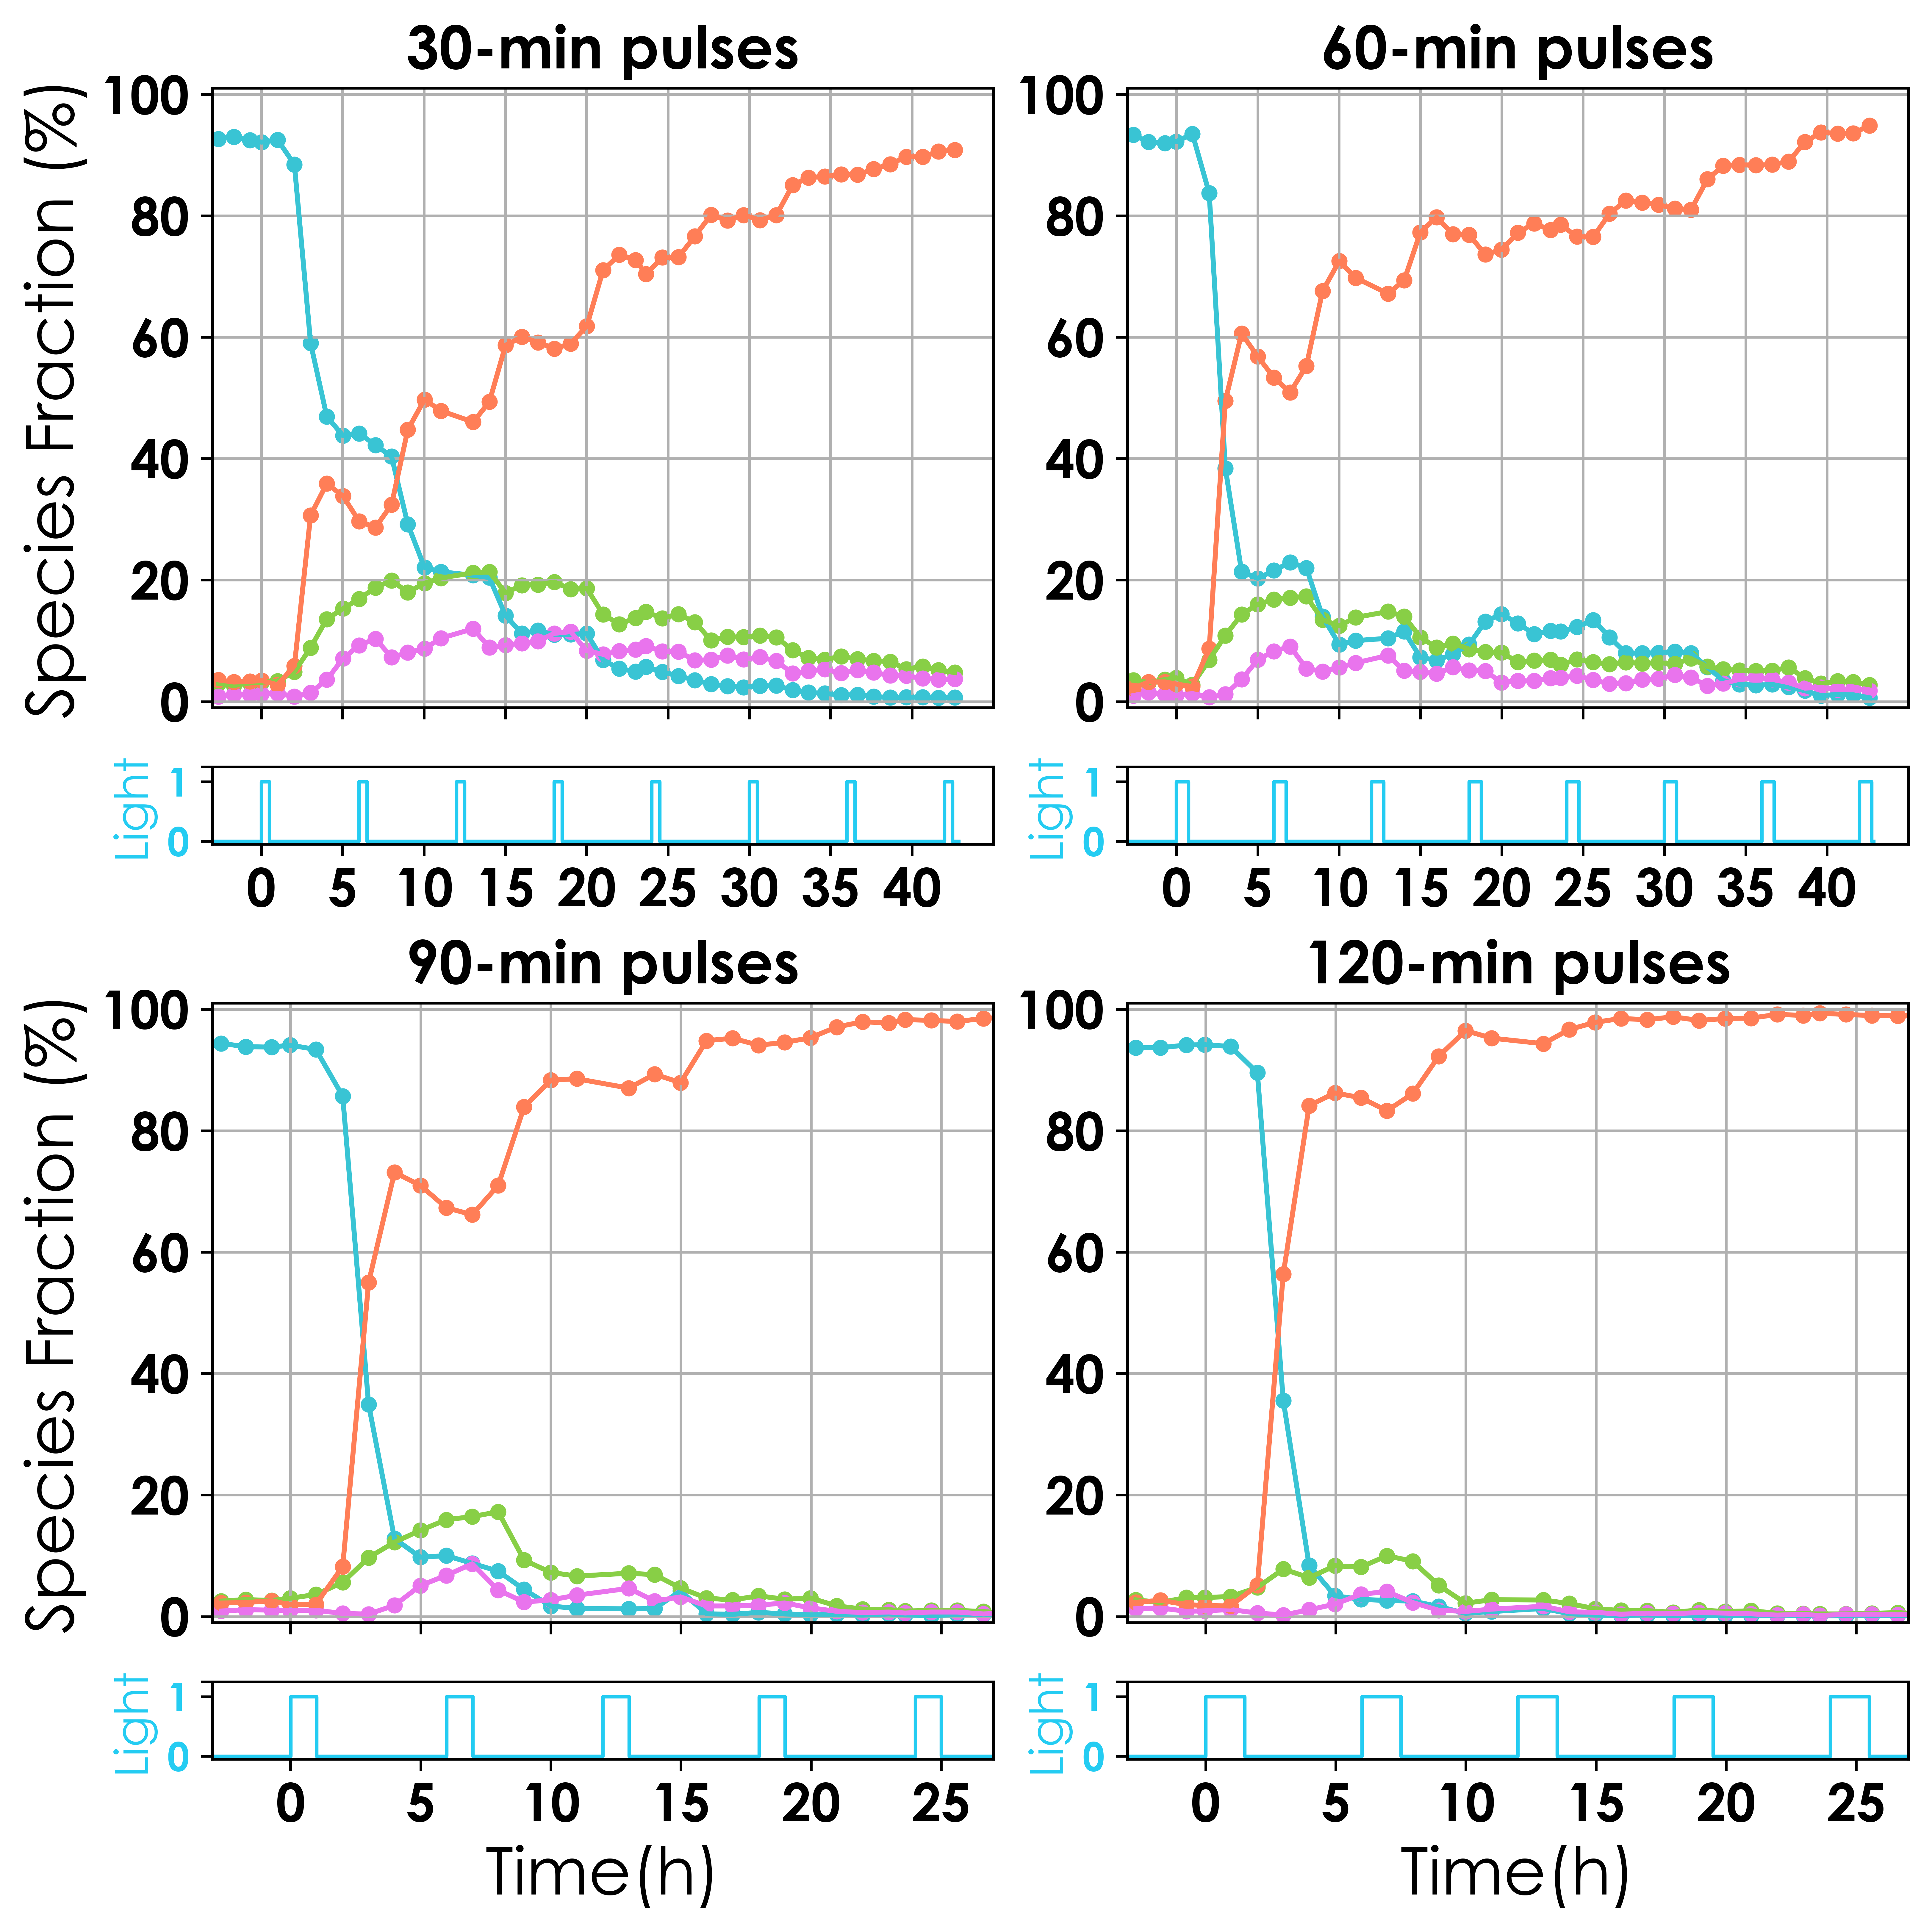

In [8]:
mosaic = """
    AAAAAAAABBBBBBBB
    AAAAAAAABBBBBBBB
    AAAAAAAABBBBBBBB
    AAAAAAAABBBBBBBB
    AAAAAAAABBBBBBBB
    AAAAAAAABBBBBBBB
    AAAAAAAABBBBBBBB
    AAAAAAAABBBBBBBB
    EEEEEEEEFFFFFFFF
    CCCCCCCCDDDDDDDD
    CCCCCCCCDDDDDDDD
    CCCCCCCCDDDDDDDD
    CCCCCCCCDDDDDDDD
    CCCCCCCCDDDDDDDD
    CCCCCCCCDDDDDDDD
    CCCCCCCCDDDDDDDD
    CCCCCCCCDDDDDDDD
    GGGGGGGGHHHHHHHH
    """
axesd = plt.figure(constrained_layout=True,figsize = (8,8),dpi=800).subplot_mosaic(mosaic)
axes = [axesd[i] for i in ['A','B','C', 'D']]
axesl = [axesd[i] for i in ['E','F','G', 'H']]
thresh1 = 0.05
thresh2 = 0.95
thresh_fp = [-1, 100,50,100]
colors= ['#39c4d4','#88cf46','#e974ed','#ff7e57']
evenly_spaced_interval = np.linspace(0, 1,4*len(axes)+1)
colori = [plt.cm.inferno(x) for x in evenly_spaced_interval]
colors = [colori[3],colori[6],colori[9],colori[12]]
colors= ['#39c4d4','#88cf46','#e974ed','#ff7e57']
t_shift =25.3
t_dels = []
marks = ['o','o','o','o']
title = ['S0', 'S1','S2','S3']
labi = ['$CN$','$\overline{C}N$','$C\overline{N}$','$\overline{CN}$']
title = ['30-min pulses','60-min pulses','90-min pulses','120-min pulses']
lims = [(-1,101),(-1,101),(-1,101),(-1,101)]
xlims = [(-3,45),(-3,45),(-3,27),(-3,27)]
ticks = [[0,20,40,60,80,100],[0,20,40,60,80,100],[0,20,40,60,80,100],[0,20,40,60,80,100]]
for zz,rid in enumerate([1,2,3,4]):

    t_del = [0,1,2,3,4,5,6,7,8]
    if jj ==3:
        t_del = [0,1,2,3,4,5,6,7,8,24]
    t,rec_fraction= quant_4statefrac(all_data1[rid],t_del)
    df_LEDs = all_data1[rid].data_to_df('LEDs')
    for jj, state in enumerate(rec_fraction):
        axes[zz].grid(True)
        axes[zz].scatter(t-t_shift,state*100,s = 15 , color=colors[jj],marker = marks[jj],label = labi[jj])
        axes[zz].plot(t-t_shift,state*100 , color=colors[jj])
        axes[zz].set_title(title[zz], fontsize=fs,**cgfont,fontweight='bold')
       
        xticks = [0,5,10,15,20,25,30,35,40]
        yticks = ticks[zz]
        axes[zz].set_xticks(xticks) 
        axes[zz].set_xticklabels(['' for i in xticks], fontsize=fs-2,**cgfont)
        axes[zz].set_yticks(yticks) 
        axes[zz].set_yticklabels([str(i) for i in yticks], fontsize=fs-2,**cgfont)
        axes[zz].set_ylim(lims[zz])
        axes[zz].set_xlim(xlims[zz])
        axesl[zz].plot(df_LEDs['rel_time_hrs']-t_shift,df_LEDs['intensity'],lw = 1 , color='#24ccf2')

        axesl[zz].set_ylabel('Light',color ='#24ccf2', fontsize=fs-4,**cgfont)
        axesl[zz].set_yticks([0,40,50])
        axesl[zz].set_yticklabels(['0','1',''],color ='#24ccf2', fontsize=fs-6,**cgfont)       
        axesl[zz].set_xticks(xticks) 
        axesl[zz].set_xticklabels([str(i) for i in xticks], fontsize=fs-2,**cgfont)
        axesl[zz].set_xlim(xlims[zz])

    
axes[0].set_ylabel('Species Fraction (%)', fontsize=fs+2,**cgfont)
axes[2].set_ylabel('Species Fraction (%)', fontsize=fs+2,**cgfont)

axesl[2].set_xlabel('Time(h)', fontsize=fs+2,**cgfont)
axesl[3].set_xlabel('Time(h)', fontsize=fs+2,**cgfont)
plt.savefig('../plots' +'/Figure5b.eps',bbox_inches = 'tight')
plt.savefig('../plots' +'/Figure55b.png',bbox_inches = 'tight')
plt.savefig('../plots' +'/Figure5b.svg',bbox_inches = 'tight')

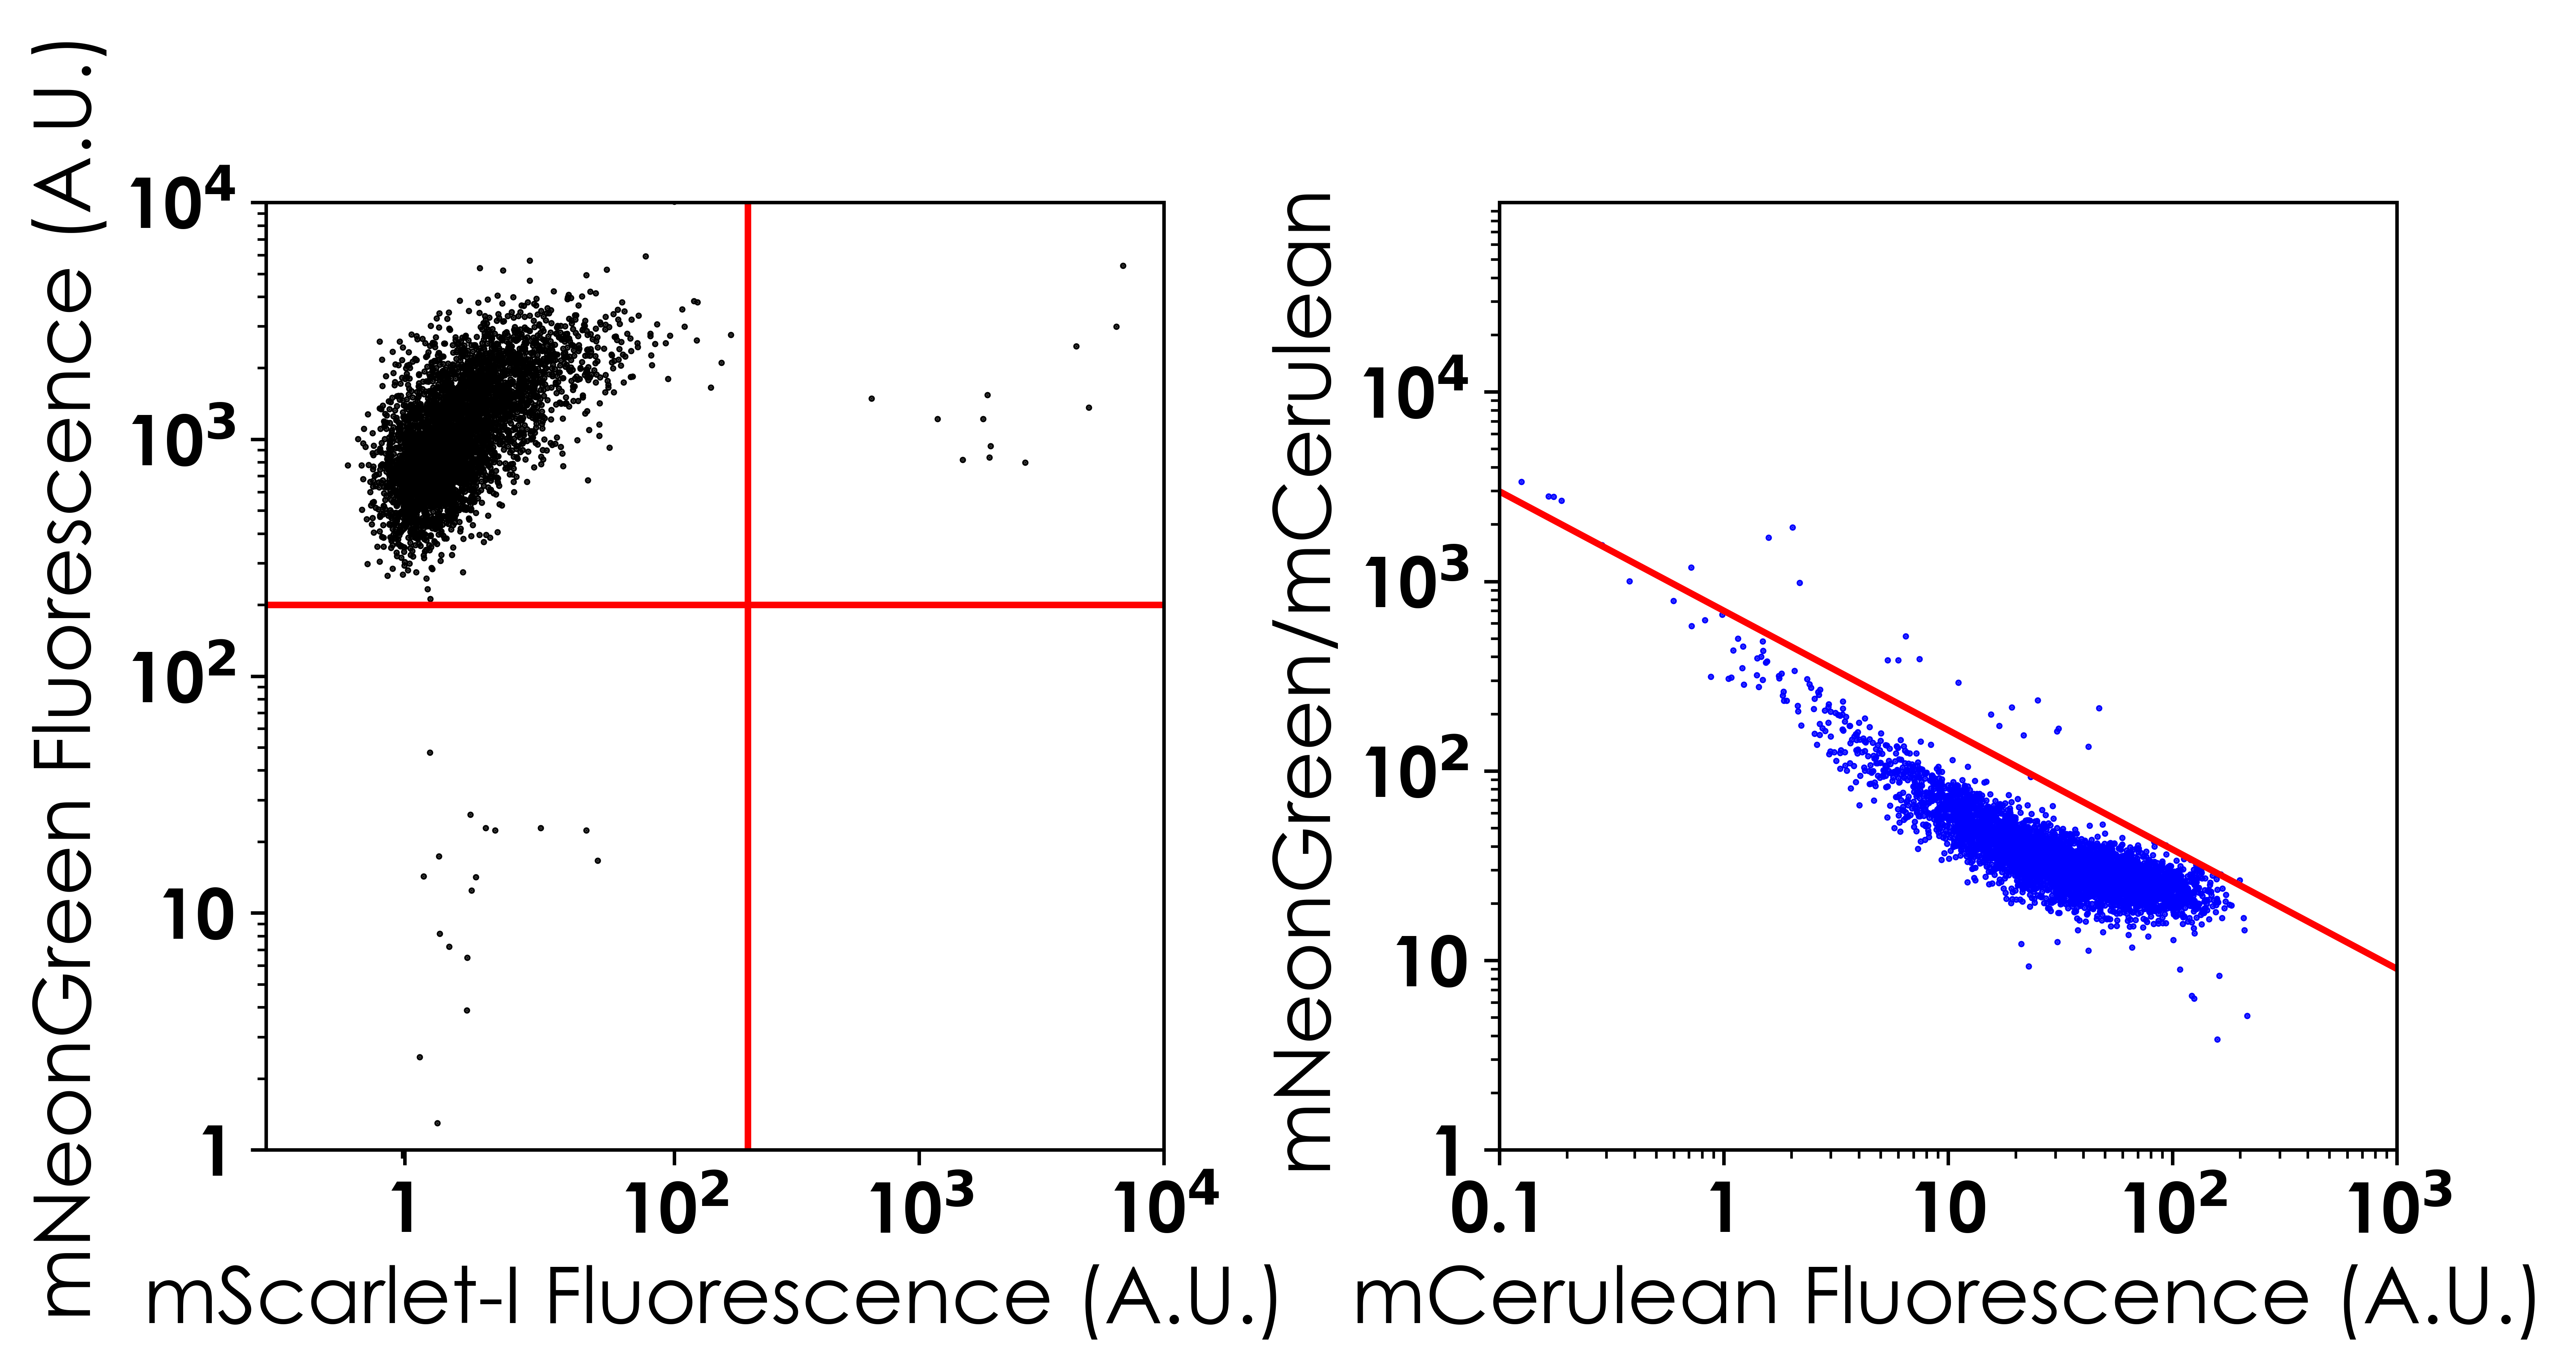

In [9]:
fig,axes = plt.subplots(1,2, figsize = (8,4),dpi =800)
axes= axes.flatten()
rid = 5
sz = 0.2
kk=9
tps = (kk, kk+2)
data = all_data1[rid]
jaja = quant_4state(data,axes,tps)
axes[0].axhline(y =200, color = 'r')
axes[0].axvline(x =200, color = 'r')
axes[0].set_xscale('symlog',linthresh =100)
axes[1].set_xscale('log')
axes[0].set_yscale('log')
axes[1].set_yscale('log')

axes[0].set_ylabel('mNeonGreen Fluorescence (A.U.)', fontsize=fs,**cgfont)
axes[1].set_ylabel('mNeonGreen/mCerulean', fontsize=fs,**cgfont)

axes[0].set_xlabel('mScarlet-I Fluorescence (A.U.)', fontsize=fs,**cgfont)
axes[1].set_xlabel('mCerulean Fluorescence (A.U.)', fontsize=fs,**cgfont)

axes[0].set_xticks([1,100,1000,10000])
axes[0].set_xticklabels(['1','10$^{2}$','10$^{3}$','10$^{4}$'], fontsize=fs-2,**cgfont)
axes[0].set_yticks([1,10,100,1000,10000])
axes[0].set_yticklabels(['1','10','10$^{2}$','10$^{3}$','10$^{4}$'], fontsize=fs-2,**cgfont)

axes[1].set_xticks([0.1,1,10,100,1000,10000])
axes[1].set_xticklabels(['0.1','1','10','10$^{2}$','10$^{3}$','10$^{4}$'], fontsize=fs-2,**cgfont)
axes[1].set_yticks([1,10,100,1000,10000])
axes[1].set_yticklabels(['1','10','10$^{2}$','10$^{3}$','10$^{4}$'], fontsize=fs-2,**cgfont)
axes[0].set_xlim(-50,10000)
axes[0].set_ylim(1,10000)
axes[1].set_xlim(0.1,1000)
axes[1].set_ylim(1,100000)
fig.tight_layout()

plt.savefig('../plots' +'/FigureS7.2c.eps',bbox_inches = 'tight')
plt.savefig('../plots' +'/FigureS7.2c.png',bbox_inches = 'tight')
plt.savefig('../plots' +'/FigureS7.2c.svg',bbox_inches = 'tight')

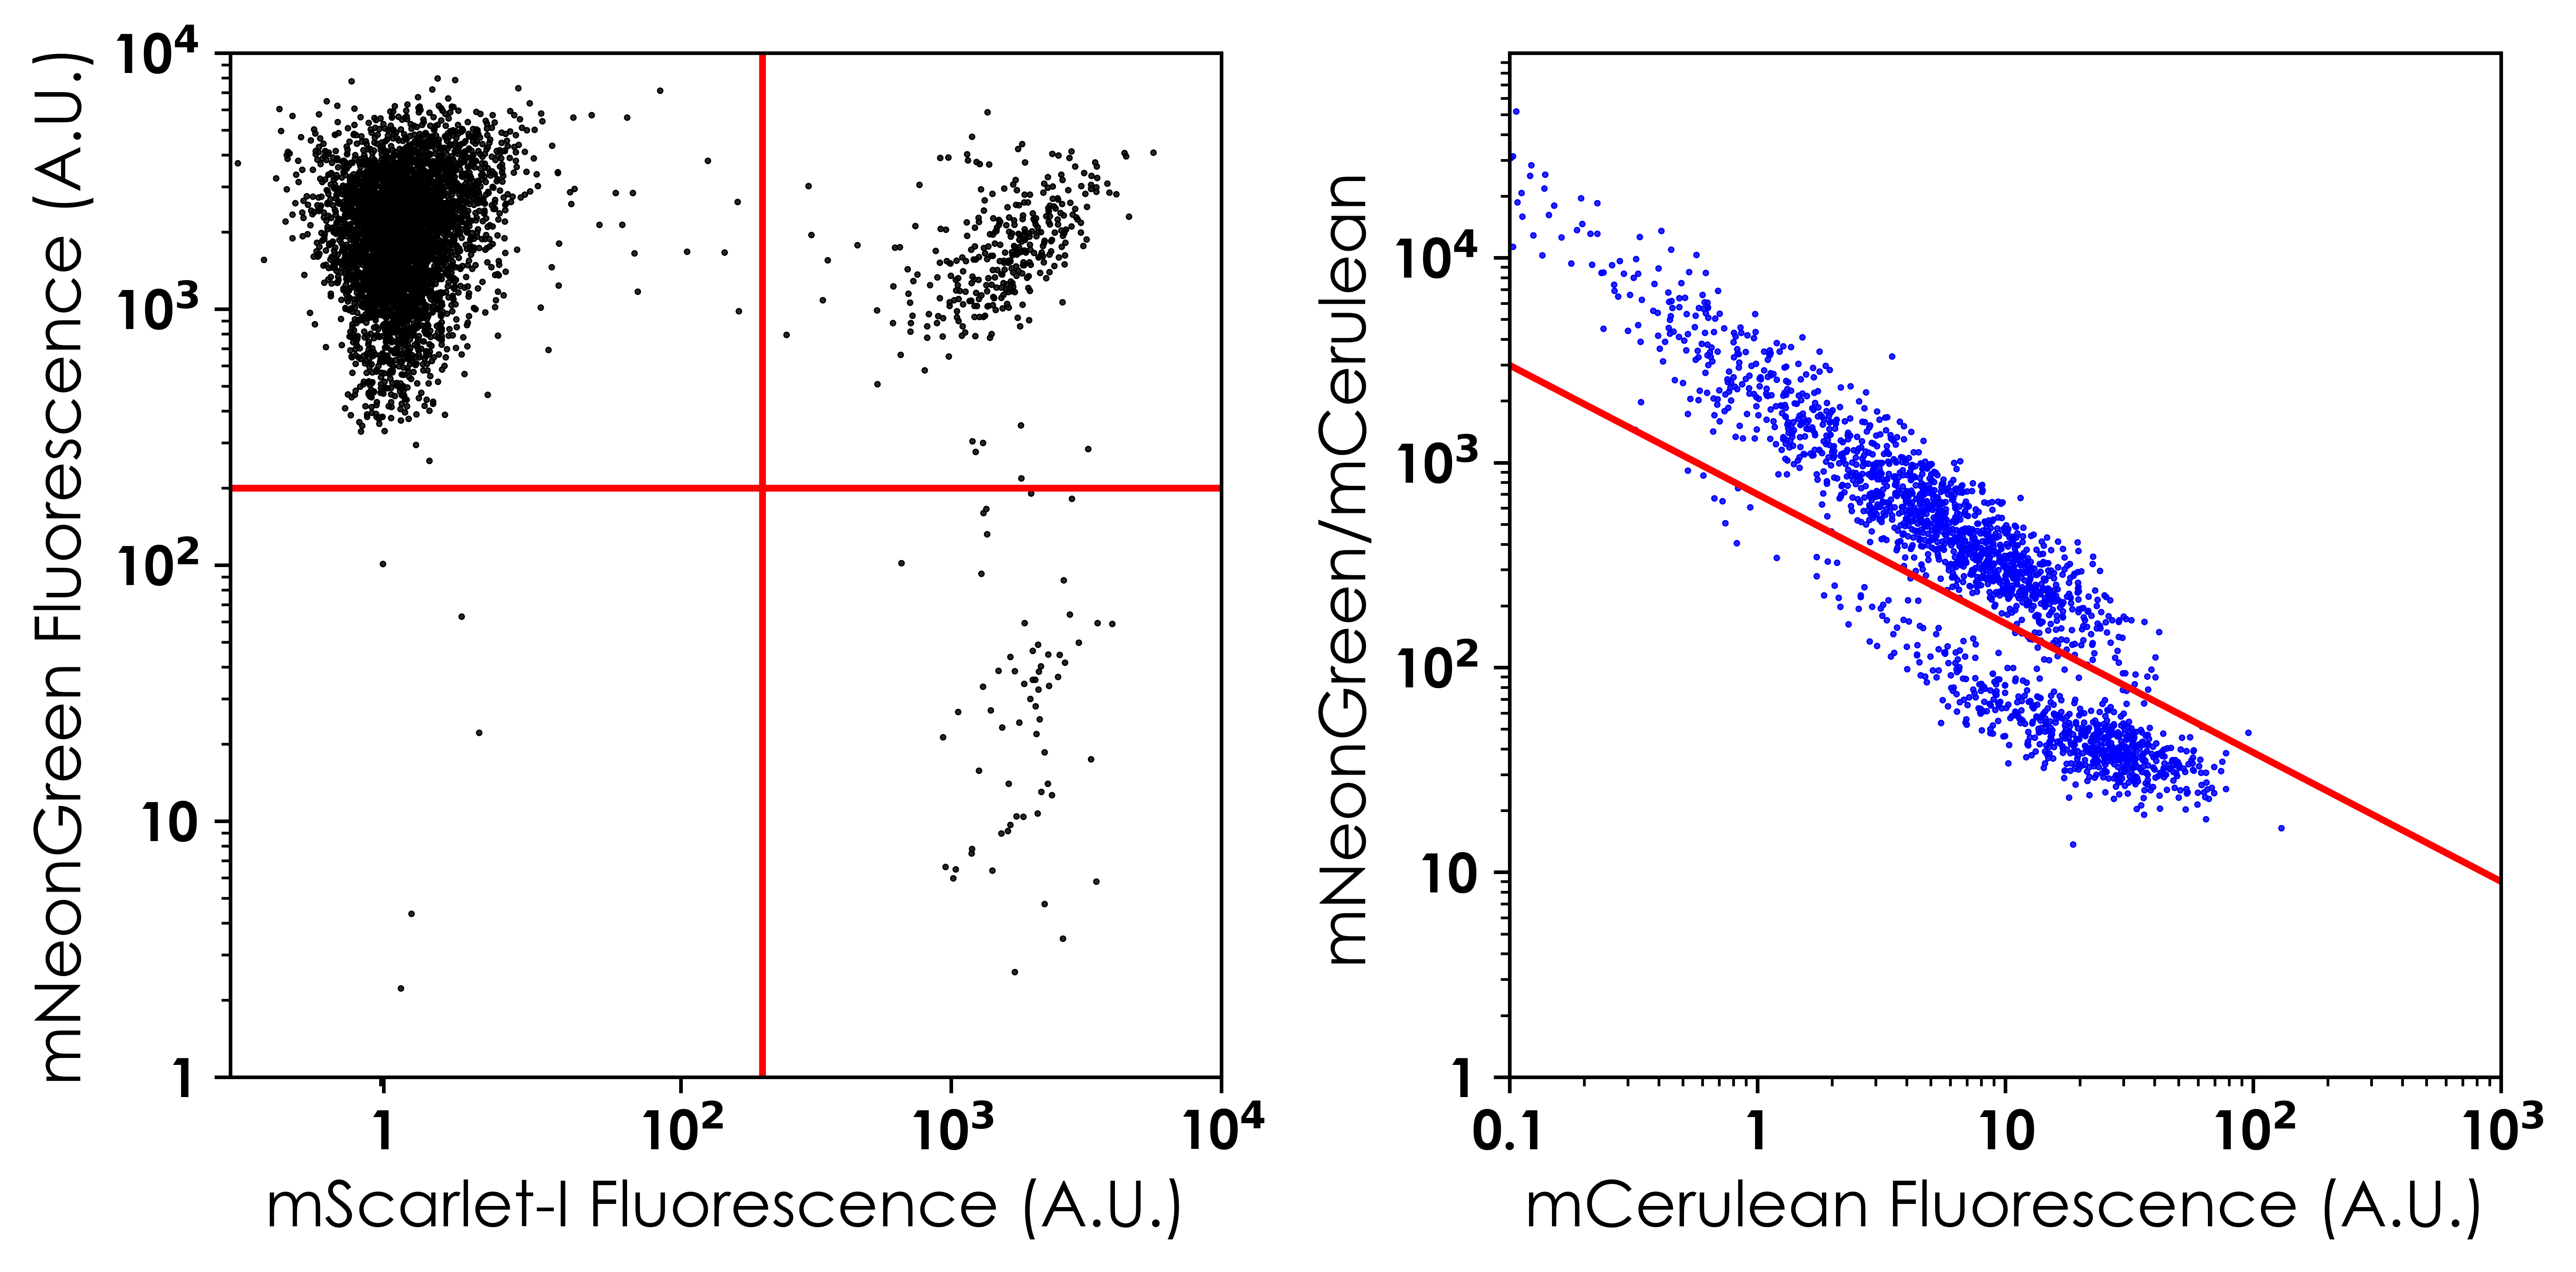

In [10]:
fig,axes = plt.subplots(1,2, figsize = (8,4),dpi =800)
axes= axes.flatten()
rid = 5
kk=30
fs = 14
tps = (kk, kk+2)
data = all_data1[rid]
sorti = quant_4state(data,axes,tps)
axes[0].axhline(y =200, color = 'r')
axes[0].axvline(x =200, color = 'r')
axes[0].set_xscale('symlog',linthresh =100)
axes[1].set_xscale('log')
axes[0].set_yscale('log')
axes[1].set_yscale('log')

axes[0].set_ylabel('mNeonGreen Fluorescence (A.U.)', fontsize=fs,**cgfont)
axes[1].set_ylabel('mNeonGreen/mCerulean', fontsize=fs,**cgfont)

axes[0].set_xlabel('mScarlet-I Fluorescence (A.U.)', fontsize=fs,**cgfont)
axes[1].set_xlabel('mCerulean Fluorescence (A.U.)', fontsize=fs,**cgfont)

axes[0].set_xticks([1,100,1000,10000])
axes[0].set_xticklabels(['1','10$^{2}$','10$^{3}$','10$^{4}$'], fontsize=fs-2,**cgfont)
axes[0].set_yticks([1,10,100,1000,10000])
axes[0].set_yticklabels(['1','10','10$^{2}$','10$^{3}$','10$^{4}$'], fontsize=fs-2,**cgfont)

axes[1].set_xticks([0.1,1,10,100,1000,10000])
axes[1].set_xticklabels(['0.1','1','10','10$^{2}$','10$^{3}$','10$^{4}$'], fontsize=fs-2,**cgfont)
axes[1].set_yticks([1,10,100,1000,10000])
axes[1].set_yticklabels(['1','10','10$^{2}$','10$^{3}$','10$^{4}$'], fontsize=fs-2,**cgfont)
axes[0].set_xlim(-50,10000)
axes[0].set_ylim(1,10000)
axes[1].set_xlim(0.1,1000)
axes[1].set_ylim(1,100000)
fig.tight_layout()

plt.savefig('../plots' +'/FigureS7.2d.eps',bbox_inches = 'tight')
plt.savefig('../plots' +'/FigureS7.2d.png',bbox_inches = 'tight')
plt.savefig('../plots' +'/FigureS7.2d.svg',bbox_inches = 'tight')

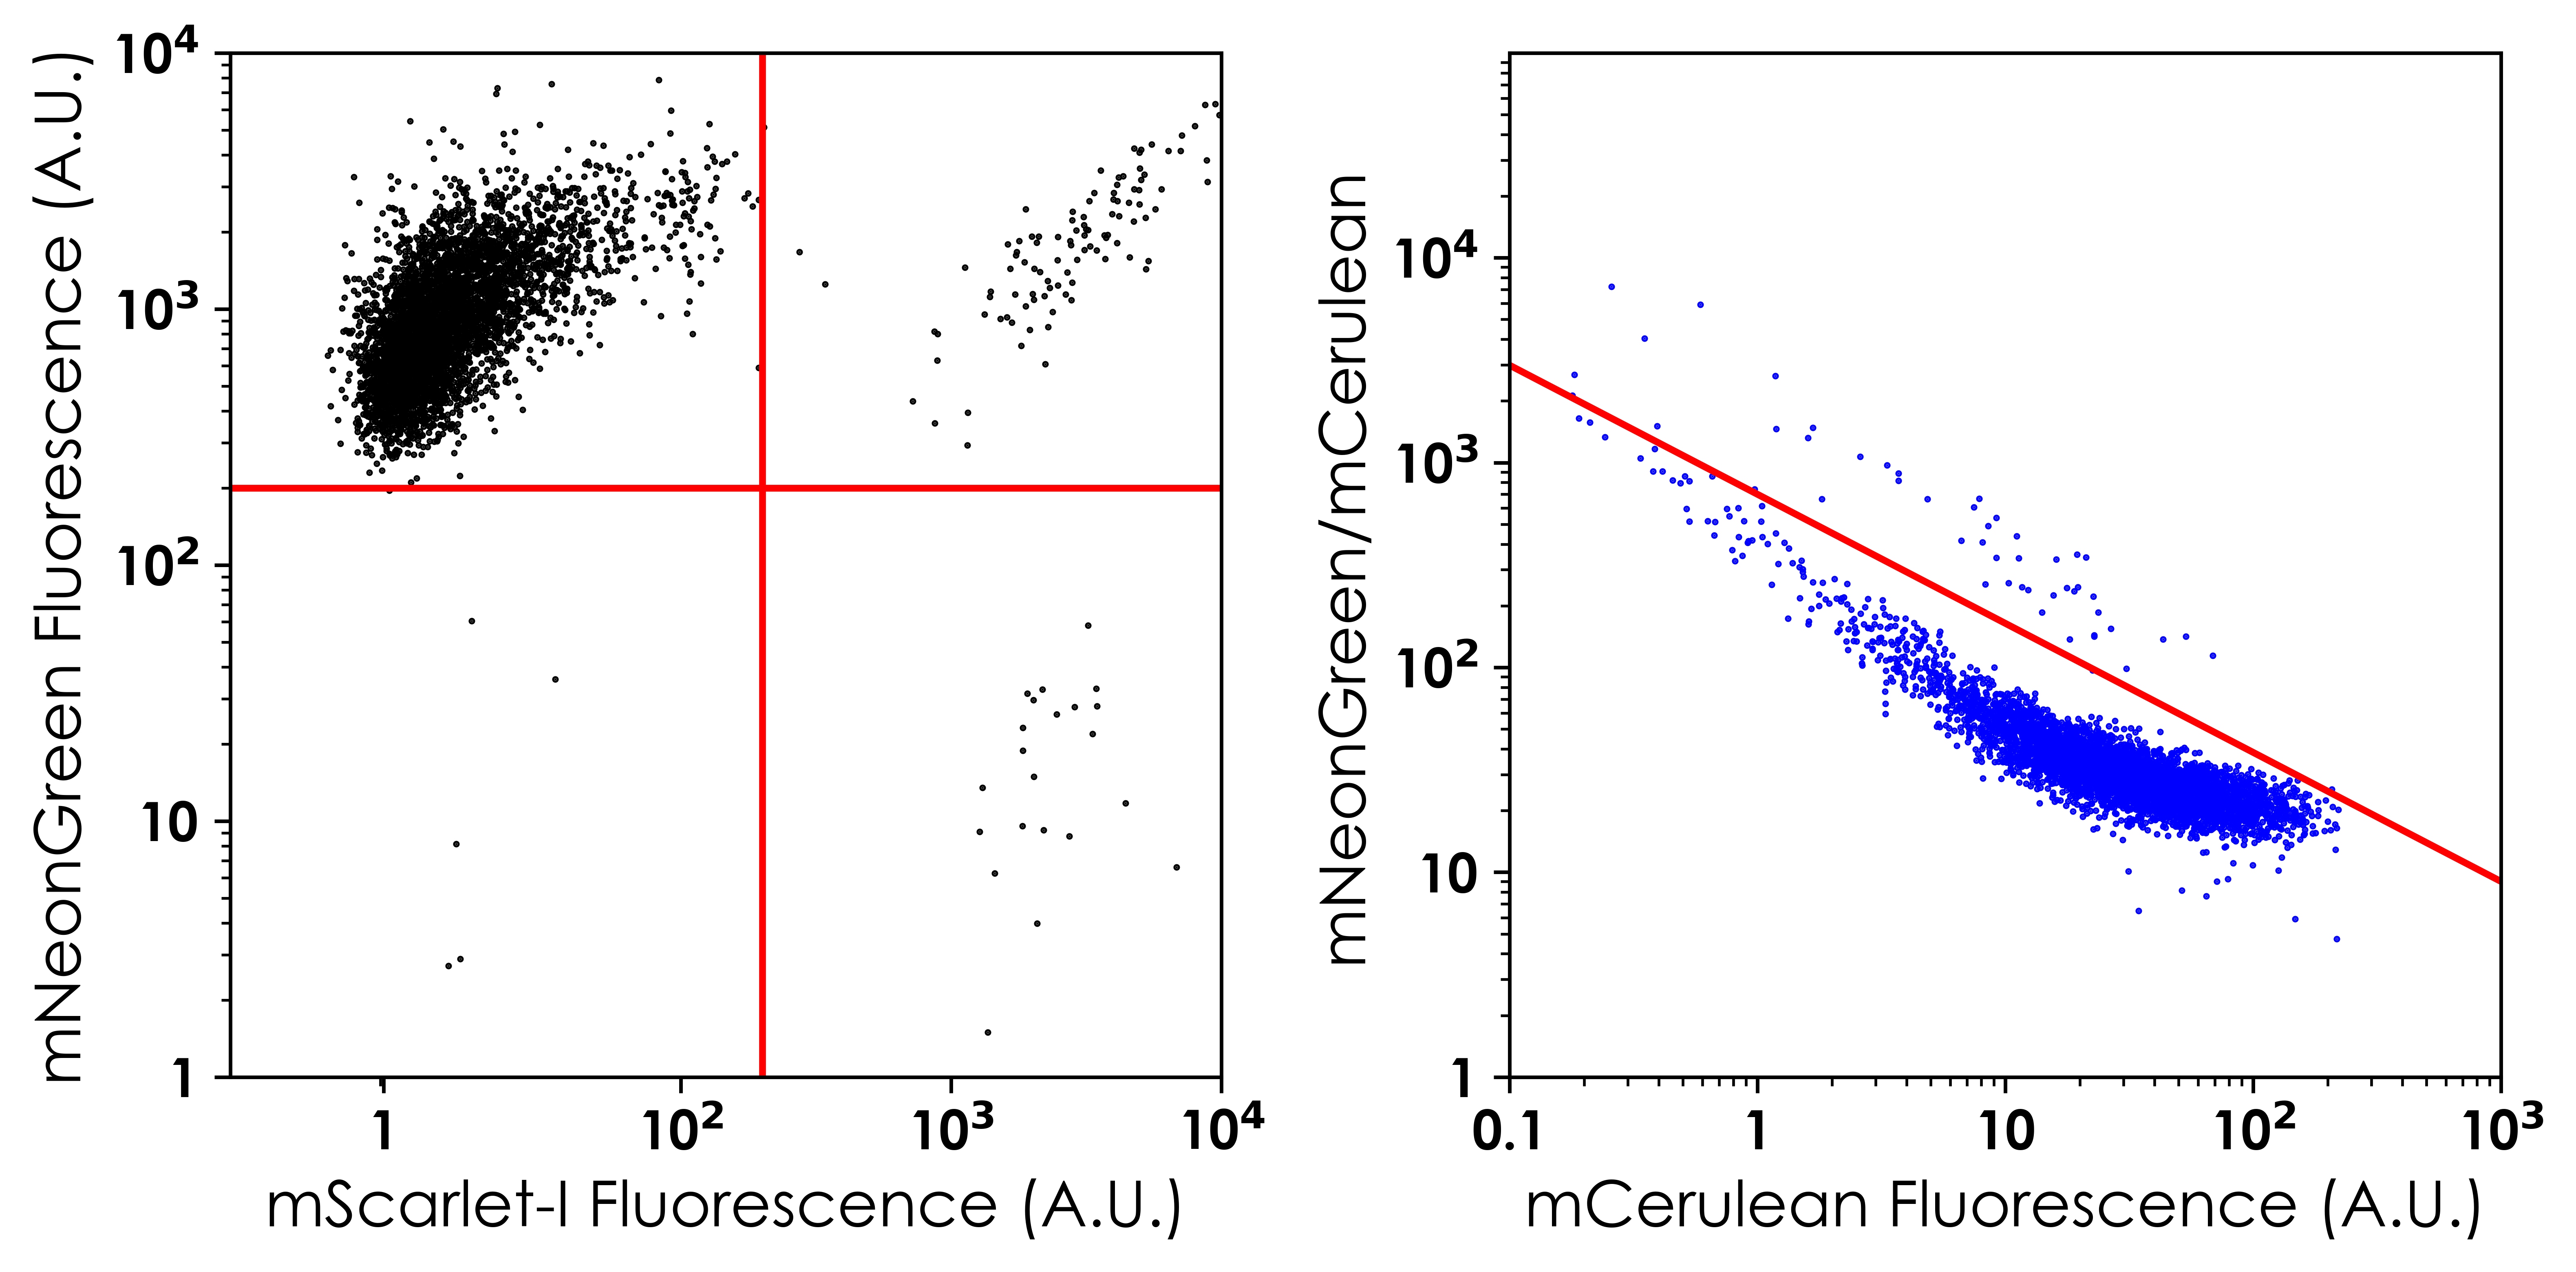

In [11]:
fig,axes = plt.subplots(1,2, figsize = (8,4),dpi =800)
axes= axes.flatten()
rid = 1
kk=9
fs = 14
tps = (kk, kk+2)
data = all_data1[rid]
jaja = quant_4state(data,axes,tps)
axes[0].axhline(y =200, color = 'r')
axes[0].axvline(x =200, color = 'r')
axes[0].set_xscale('symlog',linthresh =100)
axes[1].set_xscale('log')
axes[0].set_yscale('log')
axes[1].set_yscale('log')

axes[0].set_ylabel('mNeonGreen Fluorescence (A.U.)', fontsize=fs,**cgfont)
axes[1].set_ylabel('mNeonGreen/mCerulean', fontsize=fs,**cgfont)

axes[0].set_xlabel('mScarlet-I Fluorescence (A.U.)', fontsize=fs,**cgfont)
axes[1].set_xlabel('mCerulean Fluorescence (A.U.)', fontsize=fs,**cgfont)

axes[0].set_xticks([1,100,1000,10000])
axes[0].set_xticklabels(['1','10$^{2}$','10$^{3}$','10$^{4}$'], fontsize=fs-2,**cgfont)
axes[0].set_yticks([1,10,100,1000,10000])
axes[0].set_yticklabels(['1','10','10$^{2}$','10$^{3}$','10$^{4}$'], fontsize=fs-2,**cgfont)

axes[1].set_xticks([0.1,1,10,100,1000,10000])
axes[1].set_xticklabels(['0.1','1','10','10$^{2}$','10$^{3}$','10$^{4}$'], fontsize=fs-2,**cgfont)
axes[1].set_yticks([1,10,100,1000,10000])
axes[1].set_yticklabels(['1','10','10$^{2}$','10$^{3}$','10$^{4}$'], fontsize=fs-2,**cgfont)
axes[0].set_xlim(-50,10000)
axes[0].set_ylim(1,10000)
axes[1].set_xlim(0.1,1000)
axes[1].set_ylim(1,100000)
fig.tight_layout()
plt.savefig('../plots' +'/FigureS7.2a.eps',bbox_inches = 'tight')
plt.savefig('../plots' +'/FigureS7.2a.png',bbox_inches = 'tight')
plt.savefig('../plots' +'/FigureS7.2a.svg',bbox_inches = 'tight')

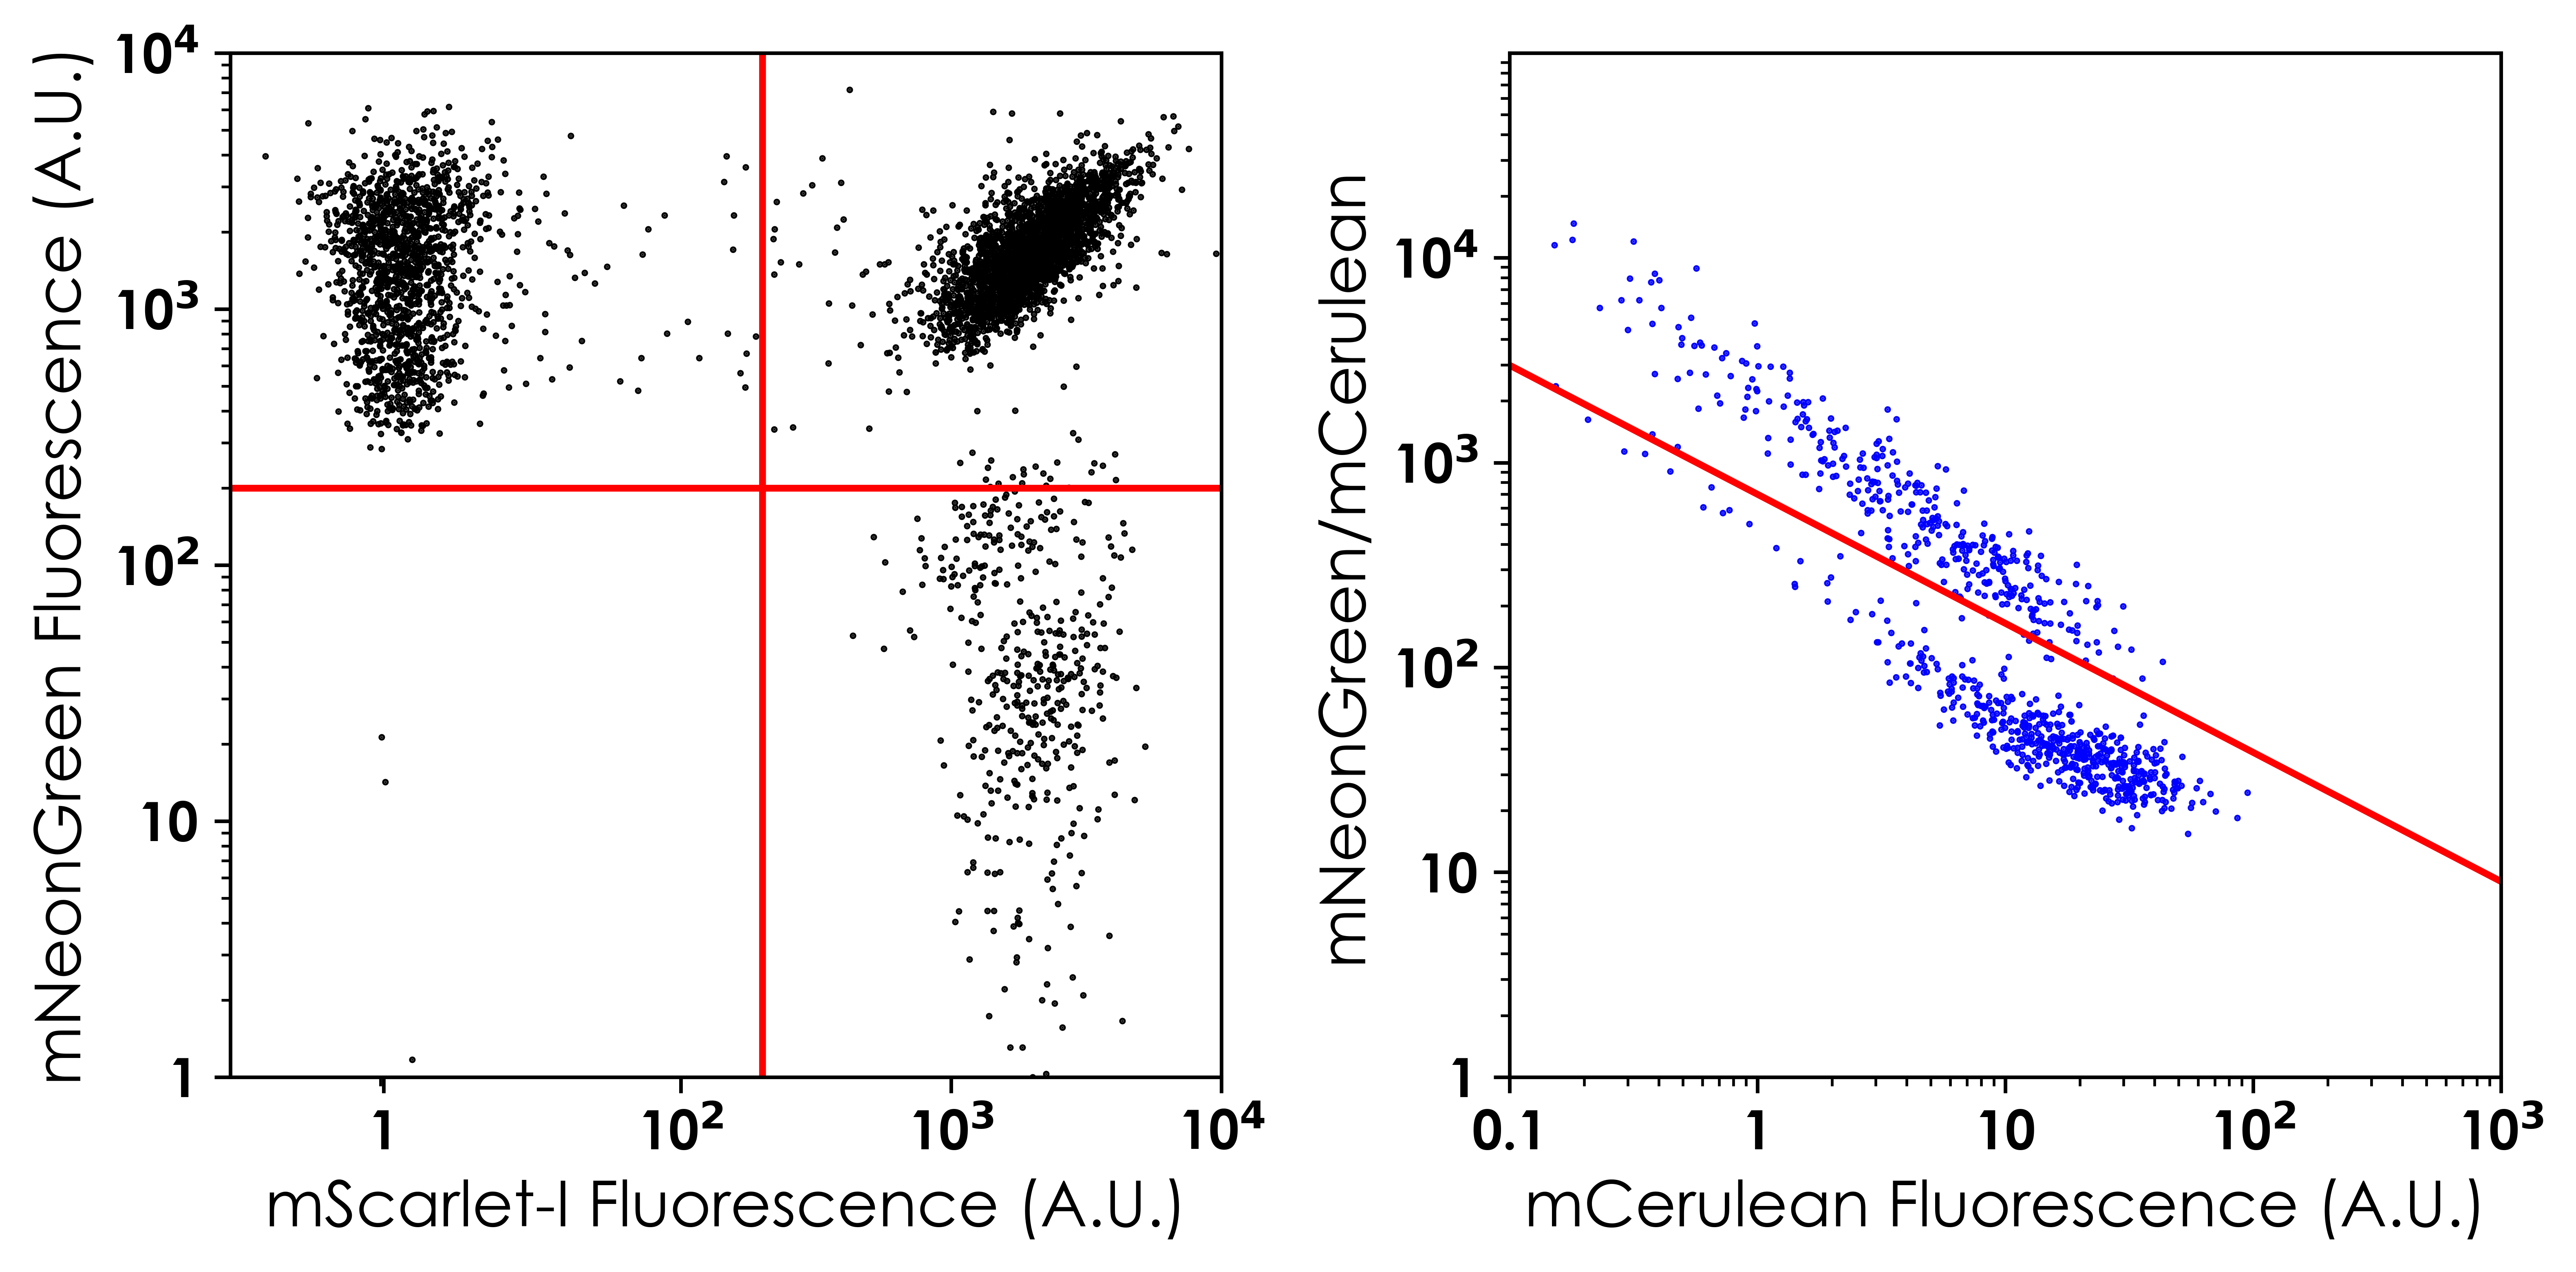

In [12]:
fig,axes = plt.subplots(1,2, figsize = (8,4),dpi =800)
axes= axes.flatten()
rid = 1
kk=30
fs = 14
tps = (kk, kk+2)
data = all_data1[rid]
jaja = quant_4state(data,axes,tps)
axes[0].axhline(y =200, color = 'r')
axes[0].axvline(x =200, color = 'r')
axes[0].set_xscale('symlog',linthresh =100)
axes[1].set_xscale('log')
axes[0].set_yscale('log')
axes[1].set_yscale('log')

axes[0].set_ylabel('mNeonGreen Fluorescence (A.U.)', fontsize=fs,**cgfont)
axes[1].set_ylabel('mNeonGreen/mCerulean', fontsize=fs,**cgfont)

axes[0].set_xlabel('mScarlet-I Fluorescence (A.U.)', fontsize=fs,**cgfont)
axes[1].set_xlabel('mCerulean Fluorescence (A.U.)', fontsize=fs,**cgfont)

axes[0].set_xticks([1,100,1000,10000])
axes[0].set_xticklabels(['1','10$^{2}$','10$^{3}$','10$^{4}$'], fontsize=fs-2,**cgfont)
axes[0].set_yticks([1,10,100,1000,10000])
axes[0].set_yticklabels(['1','10','10$^{2}$','10$^{3}$','10$^{4}$'], fontsize=fs-2,**cgfont)

axes[1].set_xticks([0.1,1,10,100,1000,10000])
axes[1].set_xticklabels(['0.1','1','10','10$^{2}$','10$^{3}$','10$^{4}$'], fontsize=fs-2,**cgfont)
axes[1].set_yticks([1,10,100,1000,10000])
axes[1].set_yticklabels(['1','10','10$^{2}$','10$^{3}$','10$^{4}$'], fontsize=fs-2,**cgfont)
axes[0].set_xlim(-50,10000)
axes[0].set_ylim(1,10000)
axes[1].set_xlim(0.1,1000)
axes[1].set_ylim(1,100000)
fig.tight_layout()
plt.savefig('../plots' +'/FigureS7.2b.eps',bbox_inches = 'tight')
plt.savefig('../plots' +'/FigureS7.2b.png',bbox_inches = 'tight')
plt.savefig('../plots' +'/FigureS7.2b.svg',bbox_inches = 'tight')